# Cleaning and EDA of Flights data

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# read in the flights dataset
flights_df = pd.read_csv('../data/flights.csv', dtype={'ORIGIN_AIRPORT':str, 'DESTINATION_AIRPORT':str})
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flights_df.shape

(5819079, 31)

In [4]:
# check for duplicate rows
flights_df[flights_df.duplicated()]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY


In [5]:
flights_df.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [6]:
flights_df['ORIGIN_AIRPORT'].value_counts()

ATL      346836
ORD      285884
DFW      239551
DEN      196055
LAX      194673
          ...  
13541        11
10165         9
14222         9
13502         6
11503         4
Name: ORIGIN_AIRPORT, Length: 628, dtype: int64

In [7]:
flights_df['DESTINATION_AIRPORT'].value_counts()

ATL      346904
ORD      285906
DFW      239582
DEN      196010
LAX      194696
          ...  
10165         9
14222         9
13502         7
11503         3
10666         1
Name: DESTINATION_AIRPORT, Length: 629, dtype: int64

In [8]:
flights_df[flights_df['ORIGIN_AIRPORT'] == 'ORD']['DESTINATION_AIRPORT'].value_counts()

LGA    9575
LAX    7941
DFW    7677
SFO    7378
BOS    6558
       ... 
STT      46
HDN      23
GUC      19
COD       9
GJT       2
Name: DESTINATION_AIRPORT, Length: 162, dtype: int64

In [9]:
flights_df[flights_df['DESTINATION_AIRPORT'] == 'ORD']['ORIGIN_AIRPORT'].value_counts()

LGA    9639
LAX    8256
DFW    7870
SFO    7380
BOS    6551
       ... 
STT      46
HDN      23
GUC      19
COD       9
MSO       2
Name: ORIGIN_AIRPORT, Length: 162, dtype: int64

In [10]:
lga_ord_df = flights_df.loc[(flights_df['ORIGIN_AIRPORT'] == 'LGA') & (flights_df['DESTINATION_AIRPORT'] == 'ORD')]
len(lga_ord_df)

9639

In [11]:
# check null values
lga_ord_df.isnull().sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER             210
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME          424
DEPARTURE_DELAY         424
TAXI_OUT                435
WHEELS_OFF              435
SCHEDULED_TIME            0
ELAPSED_TIME            460
AIR_TIME                460
DISTANCE                  0
WHEELS_ON               439
TAXI_IN                 439
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME            439
ARRIVAL_DELAY           460
DIVERTED                  0
CANCELLED                 0
CANCELLATION_REASON    9204
AIR_SYSTEM_DELAY       7687
SECURITY_DELAY         7687
AIRLINE_DELAY          7687
LATE_AIRCRAFT_DELAY    7687
WEATHER_DELAY          7687
dtype: int64

In [12]:
# porportions of null values in each column
lga_ord_df.isnull().mean()

YEAR                   0.000000
MONTH                  0.000000
DAY                    0.000000
DAY_OF_WEEK            0.000000
AIRLINE                0.000000
FLIGHT_NUMBER          0.000000
TAIL_NUMBER            0.021786
ORIGIN_AIRPORT         0.000000
DESTINATION_AIRPORT    0.000000
SCHEDULED_DEPARTURE    0.000000
DEPARTURE_TIME         0.043988
DEPARTURE_DELAY        0.043988
TAXI_OUT               0.045129
WHEELS_OFF             0.045129
SCHEDULED_TIME         0.000000
ELAPSED_TIME           0.047723
AIR_TIME               0.047723
DISTANCE               0.000000
WHEELS_ON              0.045544
TAXI_IN                0.045544
SCHEDULED_ARRIVAL      0.000000
ARRIVAL_TIME           0.045544
ARRIVAL_DELAY          0.047723
DIVERTED               0.000000
CANCELLED              0.000000
CANCELLATION_REASON    0.954871
AIR_SYSTEM_DELAY       0.797489
SECURITY_DELAY         0.797489
AIRLINE_DELAY          0.797489
LATE_AIRCRAFT_DELAY    0.797489
WEATHER_DELAY          0.797489
dtype: f

In [13]:
pd.options.mode.chained_assignment = None

In [14]:
# drop last 6 columns that are majority null values
drop_features = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
lga_ord_df.drop(columns=drop_features, inplace=True)

In [15]:
lga_ord_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
840,2015,1,1,4,UA,463,N482UA,LGA,ORD,700,...,156.0,136.0,733,827.0,7.0,839,834.0,-5.0,0,0
874,2015,1,1,4,AA,315,N3MAAA,LGA,ORD,700,...,165.0,136.0,733,830.0,13.0,845,843.0,-2.0,0,0
2067,2015,1,1,4,NK,847,N601NK,LGA,ORD,830,...,155.0,132.0,733,1042.0,9.0,1008,1051.0,43.0,0,0
2241,2015,1,1,4,AA,317,N3MBAA,LGA,ORD,845,...,161.0,134.0,733,1011.0,11.0,1030,1022.0,-8.0,0,0
2416,2015,1,1,4,UA,711,N443UA,LGA,ORD,900,...,145.0,129.0,733,1016.0,3.0,1039,1019.0,-20.0,0,0


In [16]:
# check the number of rows that contain any null values
len(lga_ord_df[lga_ord_df.isnull().any(axis=1)])

460

In [17]:
# check the ratio of null rows to the total number of flights
lga_ord_df[lga_ord_df.isnull().any(axis=1)].shape[0]/lga_ord_df.shape[0]

0.047722792820832034

The remaining rows containing null values are mostly in columns related to time. The accuracy of these columns would be necessary to either calculate the level of delay or to predict delay. Since these rows with null values are less than 5% of the total data, we will drop these rows.

In [18]:
drop_index = lga_ord_df[lga_ord_df.isnull().any(axis=1)].index

In [19]:
lga_ord_df.drop(index=drop_index, inplace=True)

In [20]:
lga_ord_df.shape

(9179, 25)

In [21]:
lga_ord_df.reset_index(drop=True, inplace=True)
lga_ord_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,UA,463,N482UA,LGA,ORD,700,...,156.0,136.0,733,827.0,7.0,839,834.0,-5.0,0,0
1,2015,1,1,4,AA,315,N3MAAA,LGA,ORD,700,...,165.0,136.0,733,830.0,13.0,845,843.0,-2.0,0,0
2,2015,1,1,4,NK,847,N601NK,LGA,ORD,830,...,155.0,132.0,733,1042.0,9.0,1008,1051.0,43.0,0,0
3,2015,1,1,4,AA,317,N3MBAA,LGA,ORD,845,...,161.0,134.0,733,1011.0,11.0,1030,1022.0,-8.0,0,0
4,2015,1,1,4,UA,711,N443UA,LGA,ORD,900,...,145.0,129.0,733,1016.0,3.0,1039,1019.0,-20.0,0,0


In [22]:
# combine the year, month, day to a single DATE column.
lga_ord_df['DATE'] = lga_ord_df[['YEAR','MONTH','DAY']].astype(str).apply('-'.join, axis=1)

In [23]:
lga_ord_df['DATE'] = pd.to_datetime(lga_ord_df['DATE'])

In [24]:
lga_ord_df.drop(columns=['YEAR','MONTH','DAY'], inplace=True)

In [25]:
lga_ord_df.head()

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE
0,4,UA,463,N482UA,LGA,ORD,700,658.0,-2.0,13.0,...,136.0,733,827.0,7.0,839,834.0,-5.0,0,0,2015-01-01
1,4,AA,315,N3MAAA,LGA,ORD,700,658.0,-2.0,16.0,...,136.0,733,830.0,13.0,845,843.0,-2.0,0,0,2015-01-01
2,4,NK,847,N601NK,LGA,ORD,830,916.0,46.0,14.0,...,132.0,733,1042.0,9.0,1008,1051.0,43.0,0,0,2015-01-01
3,4,AA,317,N3MBAA,LGA,ORD,845,841.0,-4.0,16.0,...,134.0,733,1011.0,11.0,1030,1022.0,-8.0,0,0,2015-01-01
4,4,UA,711,N443UA,LGA,ORD,900,854.0,-6.0,13.0,...,129.0,733,1016.0,3.0,1039,1019.0,-20.0,0,0,2015-01-01


In [26]:
lga_ord_df.columns

Index(['DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'DATE'],
      dtype='object')

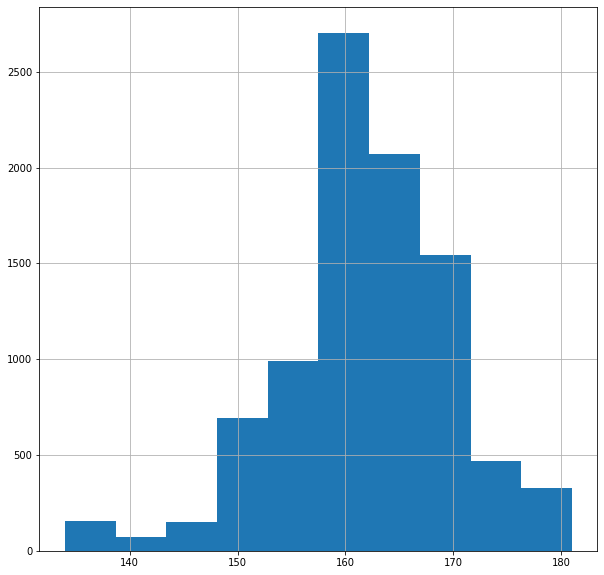

In [27]:
# check the distributions of the scheduled time
lga_ord_df['SCHEDULED_TIME'].hist(figsize=(10,10))
plt.show;

The length of the scheduled time from departure and arrival can vary between less than two hours to three hours for flights from LGA to ORD.

In [28]:
# Check the number of diverted flights
lga_ord_df['DIVERTED'].value_counts()

0    9179
Name: DIVERTED, dtype: int64

There were no diverted flights found in this specific flight route.

In [29]:
# Check the number of cancelled flights
lga_ord_df['CANCELLED'].value_counts()

0    9179
Name: CANCELLED, dtype: int64

There were no cancelled flights found in this specific flight route.

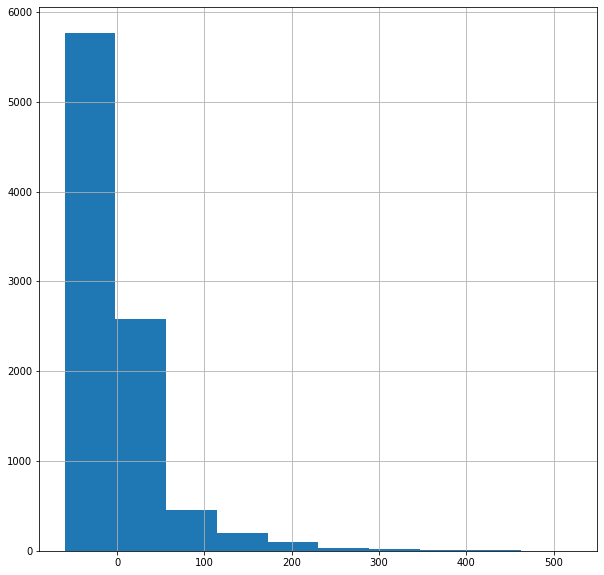

In [30]:
# check the distributions of the arrival delay time
lga_ord_df['ARRIVAL_DELAY'].hist(figsize=(10,10))
plt.show;

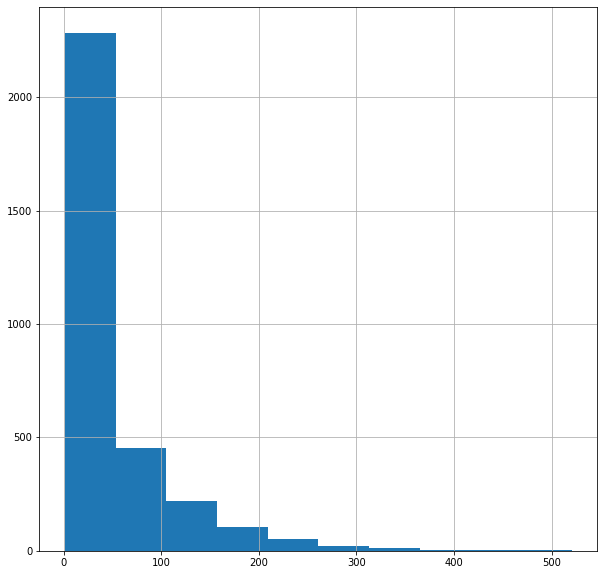

In [31]:
# check the distributions of the arrival delay time for delays more than 15 minutes
lga_ord_df[lga_ord_df['ARRIVAL_DELAY'] > 0]['ARRIVAL_DELAY'].hist(figsize=(10,10))
plt.show;

In [32]:
lga_ord_df[lga_ord_df['ARRIVAL_DELAY'] > 0]['ARRIVAL_DELAY'].describe()

count    3154.000000
mean       46.637920
std        61.621484
min         1.000000
25%         9.000000
50%        22.000000
75%        60.000000
max       521.000000
Name: ARRIVAL_DELAY, dtype: float64

In [33]:

lga_ord_df[lga_ord_df['ARRIVAL_DELAY'] > 0]['ARRIVAL_DELAY'].median()

22.0

Delays in this flight plan can range from 0 to 500+ hours in extreme cases.

We will create labels to for the amount of delay in order to build a clasiification model

In [34]:
# create a funtion to classify delays
def delay_severity(m):
    if m > 30:
        delay_type = 'major'
    elif m > 0:
        delay_type = 'minor'
    else:
        delay_type = 'on-time'
    return delay_type

In [35]:
lga_ord_df['DELAY_SEVERITY'] = lga_ord_df['ARRIVAL_DELAY'].apply(delay_severity)

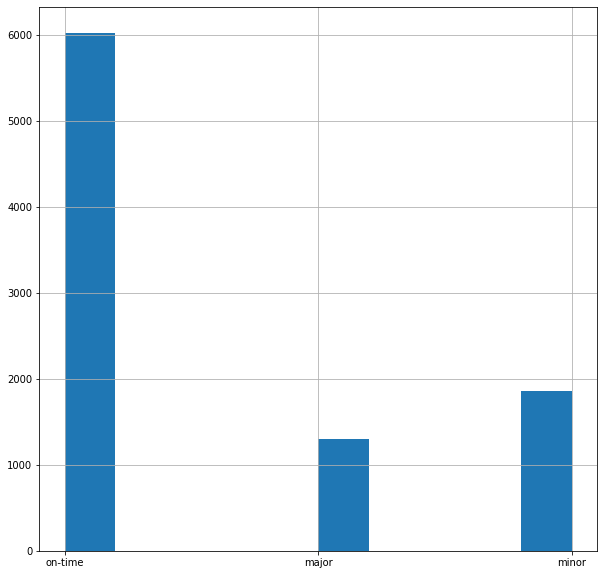

In [36]:
# check the distributions of the delay severity
lga_ord_df['DELAY_SEVERITY'].hist(figsize=(10,10))
plt.show;

In [37]:
# check the proportions of delay severity
lga_ord_df['DELAY_SEVERITY'].value_counts(normalize=True)

on-time    0.656390
minor      0.202201
major      0.141410
Name: DELAY_SEVERITY, dtype: float64

These will be our baseline scores for our models.

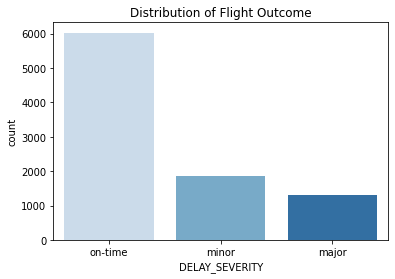

In [38]:
# plot the classes to vizualize data imbalance
sns.countplot(x='DELAY_SEVERITY',
              data=lga_ord_df,
              order = lga_ord_df['DELAY_SEVERITY'].value_counts(normalize=True).index,
              palette='Blues')
plt.title('Distribution of Flight Outcome');

In [39]:
# drop columns for data that is not known prior to each flight (except for target variable)
# drop columns that are not relevant to our model (flight and tail numbers)
# drop columns that contained no positive results (diverted and cancelled)
drop_features_2 = ['FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_TIME',
                   'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF','SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
                   'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED']
lga_ord_df.drop(columns=drop_features_2, inplace=True)

In [40]:
lga_ord_df.head()

,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DATE,DELAY_SEVERITY
0,4,UA,700,839,2015-01-01,on-time
1,4,AA,700,845,2015-01-01,on-time
2,4,NK,830,1008,2015-01-01,major
3,4,AA,845,1030,2015-01-01,on-time
4,4,UA,900,1039,2015-01-01,on-time


In [41]:
# save cleaned data into CSV file
lga_ord_df.to_csv('../data/lga_ord_flight_delay.csv', index=False)